In [1]:
# Paso 0: Importar diferentes librerias y recursos sobre los que trabajar

import pandas as pd
import numpy as np
import pylab as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats import weightstats as w
from scipy.stats import shapiro
from scipy.stats import sem
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import seaborn as sns

In [2]:
# Paso 0: Chequear la ubicación para saber si es la folder correcta

%ls

 El volumen de la unidad C es Windows
 El número de serie del volumen es: 788B-24D1

 Directorio de C:\Users\javie\OneDrive\Escritorio\Ironhack\Final Project\HR-Leave\Analysis

19/02/2024  18:41    <DIR>          .
19/02/2024  14:13    <DIR>          ..
19/02/2024  16:23    <DIR>          .ipynb_checkpoints
19/02/2024  15:52            45.474 1. EDA - Categorical variables.ipynb
19/02/2024  18:41            39.454 EDA - num vs categorical.ipynb
19/02/2024  16:24           245.179 EDA - Numerical Variables.ipynb
18/02/2024  18:55           332.178 hr_df.csv
19/02/2024  15:55                72 Untitled.ipynb
19/02/2024  16:23                72 Untitled1.ipynb
               6 archivos        662.429 bytes
               3 dirs  361.426.087.936 bytes libres


In [3]:
# Paso 0: Eliminar restricciones de display para poder ver todas las columnas

pd.options.display.max_columns=None

In [4]:
# Paso 1: Cargar DF limpio sobre el que trabajar

df = pd.read_csv('hr_df.csv')

df

,employee_id,attrition,age,age_interval,gender,education,education_cat,education_area,marital_status,department,job_level,job_role,business_travel,business_travel_cat,distance_home,distance_interval,overtime,standard_hours,daily_rate,hourly_rate,monthly_income,monthly_rate,annual_income,companies_worked,salary_hike_per,stock_option,working_years,training_lastyear,years_company,years_curr_role,years_last_promotion,years_curr_manager,environment_satisf,environment_satisf_cat,worklife_balance,worklife_balance_cat,job_involvement,job_involvement_cat,job_satisfaction,job_satisf_cat,performance_rating,performance_rating_cat,relationship_satisf,relationship_satisf_cat
0,RDO0001,Yes,41,40-49,Female,2,College,Life Sciences,Single,Sales,analyst,Sales Executive,2,rarely,1,1-5,Yes,80,1102,94,5993,19479,83902,8,11,0,8,0,6,4,0,5,2,Medium,1,Bad,3,High,4,Very High,3,Excellent,1,Low
1,RDO0002,No,49,40-49,Male,1,Below College,Life Sciences,Married,Research & Development,analyst,Research Scientist,3,frequently,8,6-10,No,80,279,61,5130,24907,71820,1,23,1,10,3,10,7,1,7,3,High,3,Better,2,Medium,2,Medium,4,Outstanding,4,Very High
2,RDO0003,Yes,37,30-39,Male,2,College,Other,Single,Research & Development,associate,Laboratory Technician,2,rarely,2,1-5,Yes,80,1373,92,2090,2396,29260,6,15,0,7,3,0,0,0,0,4,Very High,3,Better,2,Medium,3,High,3,Excellent,2,Medium
3,RDO0004,No,33,30-39,Female,4,Master,Life Sciences,Married,Research & Development,associate,Research Scientist,3,frequently,3,1-5,Yes,80,1392,56,2909,23159,40726,1,11,0,8,3,8,7,3,0,4,Very High,3,Better,3,High,3,High,3,Excellent,3,High
4,RDO0005,No,27,18-29,Male,1,Below College,Medical,Married,Research & Development,associate,Laboratory Technician,2,rarely,2,1-5,No,80,591,40,3468,16632,48552,9,12,1,6,3,2,2,2,2,1,Low,3,Better,3,High,2,Medium,3,Excellent,4,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,RDO1466,No,36,30-39,Male,2,College,Medical,Married,Research & Development,analyst,Laboratory Technician,3,frequently,23,20+,No,80,884,41,2571,12290,35994,4,17,1,17,3,5,2,0,3,3,High,3,Better,4,Very High,4,Very High,3,Excellent,3,High
1466,RDO1467,No,39,30-39,Male,1,Below College,Medical,Married,Research & Development,specialist,Healthcare Representative,2,rarely,6,6-10,No,80,613,42,9991,21457,139874,4,15,1,9,5,7,7,1,7,4,Very High,3,Better,2,Medium,1,Low,3,Excellent,1,Low
1467,RDO1468,No,27,18-29,Male,3,Bachelor,Life Sciences,Married,Research & Development,analyst,Manufacturing Director,2,rarely,4,1-5,Yes,80,155,87,6142,5174,85988,1,20,1,6,0,6,2,0,3,2,Medium,3,Better,4,Very High,2,Medium,4,Outstanding,2,Medium
1468,RDO1469,No,49,40-49,Male,3,Bachelor,Medical,Married,Sales,analyst,Sales Executive,3,frequently,2,1-5,No,80,1023,63,5390,13243,75460,2,14,0,17,3,9,6,0,8,4,Very High,2,Good,2,Medium,2,Medium,3,Excellent,4,Very High


In [5]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway

# Ejemplo con la prueba t de Student
grupo1 = df[df['attrition'] == 'Yes']['daily_rate']
grupo2 = df[df['attrition'] == 'No']['daily_rate']
t_statistic, p_value = ttest_ind(grupo1, grupo2)
print(f"T-Statistic: {t_statistic}, p-value: {p_value}")

T-Statistic: -2.1740836777017747, p-value: 0.02985816066026497


In [6]:
from statsmodels.multivariate.manova import MANOVA

formula = 'companies_worked + salary_hike_per + working_years + annual_income+ distance_home + performance_rating ~ C(attrition)'

manova = MANOVA.from_formula(formula, data=df)

print(manova.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0121 6.0000 1463.0000 19953.1233 0.0000
         Pillai's trace  0.9879 6.0000 1463.0000 19953.1233 0.0000
 Hotelling-Lawley trace 81.8310 6.0000 1463.0000 19953.1233 0.0000
    Roy's greatest root 81.8310 6.0000 1463.0000 19953.1233 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
          C(attrition)      Value  Num DF   Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.9541 6.0000 1463.0000 11.7329 0.0000
             Pil

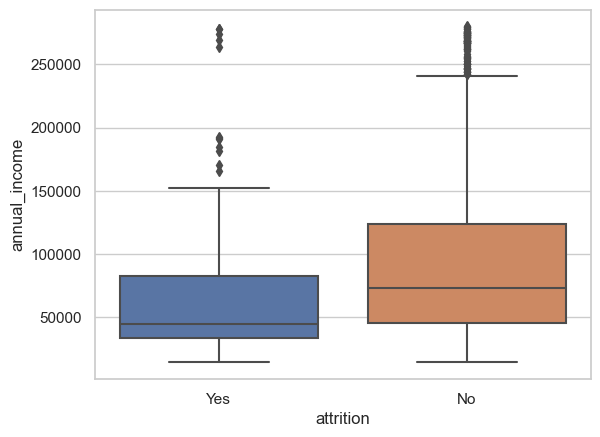

T-statistic: -6.203935765608937
P-value: 7.147363985353863e-10
Correlación de punto biserial: 0.15983958238498847
Coeficiente de determinación (R^2): 0.025548692097007514


In [28]:
# Annual income

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'attrition' y 'annual_income'
# Carga tus datos o ajusta el código según tu estructura de datos

# Crear un boxplot para visualizar la relación
sns.boxplot(x='attrition', y='annual_income', data=df)
plt.show()

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['annual_income']
attrition_no = df[df['attrition'] == 'No']['annual_income']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['annual_income'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')


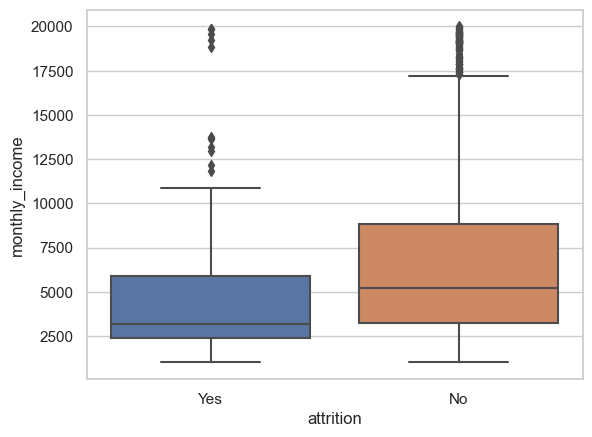

T-statistic: -6.203935765608938
P-value: 7.14736398535381e-10
Correlación de punto biserial: 0.1598395823849885
Coeficiente de determinación (R^2): 0.025548692097007525


In [29]:
#Monthly income


# Crear un boxplot para visualizar la relación
sns.boxplot(x='attrition', y='monthly_income', data=df)
plt.show()

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['monthly_income']
attrition_no = df[df['attrition'] == 'No']['monthly_income']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['monthly_income'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')


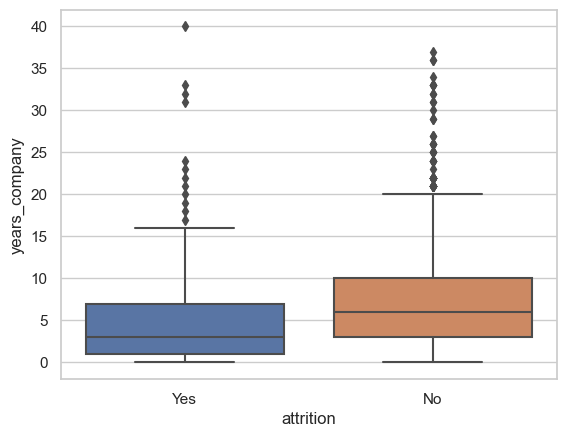

T-statistic: -5.1963086670254235
P-value: 2.3188716103863033e-07
Correlación de punto biserial: 0.13439221398997694
Coeficiente de determinación (R^2): 0.018061267181127754


In [18]:
# Years company


# Crear un boxplot para visualizar la relación
sns.boxplot(x='attrition', y='years_company', data=df)
plt.show()

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['years_company']
attrition_no = df[df['attrition'] == 'No']['years_company']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['years_company'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')

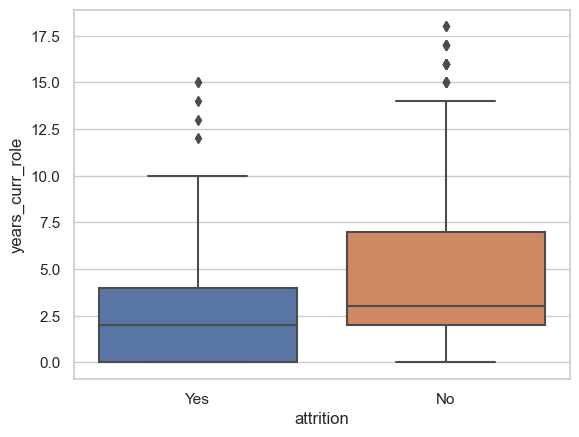

T-statistic: -6.232038413295282
P-value: 6.003185843641377e-10
Correlación de punto biserial: 0.1605450042677009
Coeficiente de determinación (R^2): 0.0257746983953161


In [19]:
# Years in current role


# Crear un boxplot para visualizar la relación
sns.boxplot(x='attrition', y='years_curr_role', data=df)
plt.show()

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['years_curr_role']
attrition_no = df[df['attrition'] == 'No']['years_curr_role']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['years_curr_role'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')

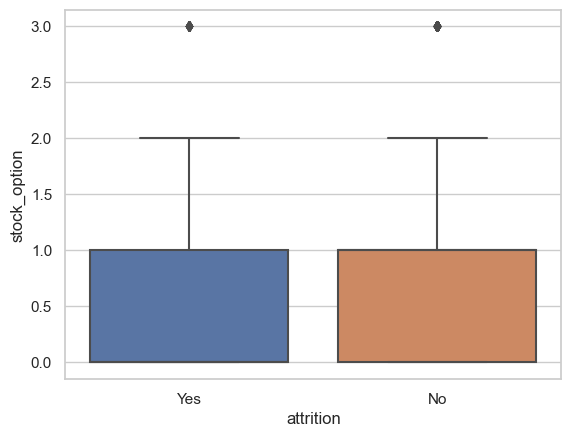

T-statistic: -5.3047620976099115
P-value: 1.3010149660019924e-07
Correlación de punto biserial: 0.13714491893332564
Coeficiente de determinación (R^2): 0.018808728789228464


In [24]:
# Stock option

# Crear un boxplot para visualizar la relación
sns.boxplot(x='attrition', y='stock_option', data=df)
plt.show()

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['stock_option']
attrition_no = df[df['attrition'] == 'No']['stock_option']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['stock_option'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')

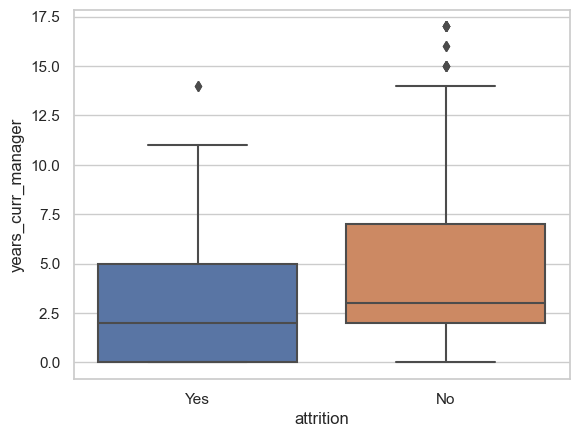

T-statistic: -6.059068531868998
P-value: 1.7369867845242207e-09
Correlación de punto biserial: 0.15619931590162822
Coeficiente de determinación (R^2): 0.02439822628813665


In [27]:
# Years current manager

# Crear un boxplot para visualizar la relación
sns.boxplot(x='attrition', y='years_curr_manager', data=df)
plt.show()

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['years_curr_manager']
attrition_no = df[df['attrition'] == 'No']['years_curr_manager']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['years_curr_manager'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')

In [32]:
# Distance home (DESCARTADO)

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['distance_home']
attrition_no = df[df['attrition'] == 'No']['distance_home']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['distance_home'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')

T-statistic: 2.994708098265125
P-value: 0.0027930600802134266
Correlación de punto biserial: -0.07792358295570354
Coeficiente de determinación (R^2): 0.00607208478065441


In [34]:
# Companies worked (DESCARTADO)

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['companies_worked']
attrition_no = df[df['attrition'] == 'No']['companies_worked']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['companies_worked'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')

T-statistic: 1.6680187953544354
P-value: 0.0955252620565195
Correlación de punto biserial: -0.04349373905781356
Coeficiente de determinación (R^2): 0.0018917053372291771


In [35]:
# Salary hike per (DESCARTADO)

# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['salary_hike_per']
attrition_no = df[df['attrition'] == 'No']['salary_hike_per']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['salary_hike_per'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')

T-statistic: -0.5164573250747643
P-value: 0.6056128238893757
Correlación de punto biserial: 0.013478202057439105
Coeficiente de determinación (R^2): 0.00018166193070115575


In [36]:
# Realizar una prueba t de Student para comparar las medias
attrition_yes = df[df['attrition'] == 'Yes']['salary_hike_per']
attrition_no = df[df['attrition'] == 'No']['salary_hike_per']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Calcular la correlación de punto biserial (solo funciona si 'attrition' tiene dos categorías)
correlation, _ = df['attrition'].str.get_dummies().corrwith(df['salary_hike_per'])
print(f'Correlación de punto biserial: {correlation}')

# Calcular el coeficiente de determinación (R^2) entre las dos variables
r_squared = correlation**2
print(f'Coeficiente de determinación (R^2): {r_squared}')

T-statistic: -0.5164573250747643
P-value: 0.6056128238893757
Correlación de punto biserial: 0.013478202057439105
Coeficiente de determinación (R^2): 0.00018166193070115575


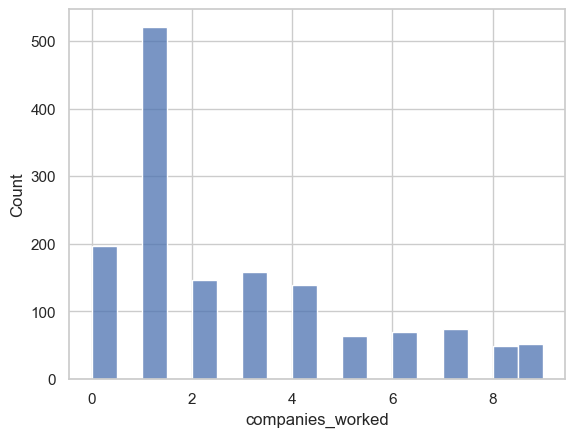

In [45]:
sns.histplot(df.companies_worked);